<font size=5>**Load Data**</font>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv
/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv')
train_score = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv')
train_df.head(10)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
5,001519c8,6,107296,107400,104,Input,q,q,q,3,1
6,001519c8,7,107469,107596,127,Input,q,q,q,4,1
7,001519c8,8,107659,107766,107,Input,q,q,q,5,1
8,001519c8,9,107743,107852,109,Input,q,q,q,6,1
9,001519c8,10,107840,107978,138,Input,Space,Space,,7,1


In [3]:
train_df.shape

(8405898, 11)

In [4]:
train_df.columns

Index(['id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count'],
      dtype='object')

In [5]:
print(str(len(train_df['event_id'].unique())) + ' quantity events')
print(str(len(train_df['id'].unique())) + ' quantity essay')

12876 quantity events
2471 quantity essay


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [7]:
train_df['down_event'].unique()

array(['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight', '-', '?', 'Tab', '"',
       'ArrowUp', 'ArrowDown', 'Rightclick', '=', 'CapsLock', 'Control',
       'c', 'v', '/', 'Delete', ':', 'z', '[', '$', '(', ')', '+', 'Home',
       'End', '\\', 'Meta', '*', '&', 'AudioVolumeMute', 'x', '!',
       'Insert', 'MediaPlayPause', 'NumLock', '%', 'V', '>', 'Alt',
       'AudioVolumeUp', 'ContextMenu', 'AudioVolumeDown', 'a', '<',
       'PageDown', ']', 'Middleclick', '@', 'F12', 'j', '\x96', 'Dead',
       't', 's', 'n', 'y', '{', 'ScrollLock', '¿', 'Process', '}',
       'MediaTrackPrevious', 'MediaTrackNext', 'F3', '^', 'Unidentified',
       'Cancel', '2', 'i', 'd', 'r', 'e', '`', '\x9b', 'm', '#', '~',
       'PageUp', 'T', 'A', 'b', 'S', 'ModeChange', '_', 'Escape', 'F11',
       'Unknownclick', 'AltGraph', 'F10', 'h', 'F15', 'Clear', 'OS', 'F',
       'C', 'o', 'Ä±', 'f', 'u', 'w', 'p', 'g', 'M', 'l', '|',
       'â\x80\x

In [8]:
train_df['activity'].unique()

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace',
       'Move From [284, 292] To [282, 290]',
       'Move From [287, 289] To [285, 287]',
       'Move From [460, 461] To [465, 466]', 'Paste',
       'Move From [905, 1314] To [907, 1316]',
       'Move From [565, 743] To [669, 847]',
       'Move From [669, 847] To [565, 743]',
       'Move From [1041, 1121] To [1496, 1576]',
       'Move From [1455, 1557] To [1323, 1425]',
       'Move From [2268, 2275] To [2247, 2254]',
       'Move From [213, 302] To [902, 991]',
       'Move From [0, 158] To [234, 392]',
       'Move From [460, 465] To [925, 930]',
       'Move From [810, 906] To [816, 912]',
       'Move From [186, 187] To [184, 185]',
       'Move From [140, 272] To [299, 431]',
       'Move From [114, 140] To [272, 298]',
       'Move From [1386, 1450] To [1445, 1509]',
       'Move From [442, 524] To [296, 378]',
       'Move From [408, 414] To [390, 396]',
       'Move From [1144, 1147] To [1142, 1145]',
       'Move 

In [9]:
train_df['text_change'].unique()

array(['NoChange', 'q', ' ', ..., 'qq qqq qqqq qqqqq',
       'qq qqqqq qqqq qq qqqqq ',
       '\n qqqqq qqqqqq qqqqqqqqqq qq q qqqqqqqq qqq qqq qqqq qqqqqq q qqq. \n\nqqqq qqq qq qqqqqqq qqq:\n- \n- qqq qqqqqqq qqqq q qqqqqq qqqqqqqq qq qqqq qqqqqqqq '],
      dtype=object)

In [10]:
train_df.describe()

,event_id,down_time,up_time,action_time,cursor_position,word_count
count,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06
mean,2.067649e+03,7.935603e+05,7.936584e+05,9.808498e+01,1.222964e+03,2.314687e+02
std,1.588284e+03,5.149451e+05,5.149428e+05,2.533985e+02,9.485242e+02,1.759088e+02
min,1.000000e+00,1.060000e+02,2.520000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.520000e+02,3.731842e+05,3.732820e+05,6.600000e+01,4.990000e+02,9.600000e+01
50%,1.726000e+03,7.208860e+05,7.209800e+05,9.300000e+01,1.043000e+03,2.000000e+02
75%,2.926000e+03,1.163042e+06,1.163141e+06,1.220000e+02,1.706000e+03,3.270000e+02
max,1.287600e+04,8.313630e+06,8.313707e+06,4.474700e+05,7.802000e+03,1.326000e+03


In [11]:
train_df[train_df['down_event'] != train_df['up_event']]

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
5115,0042269b,105,104507,104617,110,Replace,q,m,qqqqqqq qqq qqqq qqqq qqqq qq qqqqqqqq qqqqqqq...,1,4
5232,0042269b,222,158578,158638,60,Replace,q,i,qqqqqqq => q,15,14
6276,0042269b,1266,473329,473439,110,Replace,q,o,qqq qq qqq qqqqqqq qqqqqq qqqq qq => q,194,128
6825,0042269b,1815,641821,641920,99,Replace,q,t,qqq qqqqq qq qqqqqqqq qqqq qqq qqqqqqq qq qqqq...,529,190
8223,0042269b,3213,1410198,1410293,95,Replace,q,a,qqqqqqq qqqqqqqqq qqqq qqq qq qqqq qqq qqqqqqq...,1539,282
...,...,...,...,...,...,...,...,...,...,...,...
8323360,fde20dd8,2019,495093,495205,112,Replace,q,i,qqqq => q,530,167
8328686,fde20dd8,7345,1760415,1760572,157,Replace,q,y,qq qqq qqq'q qqqqq qqqqqq qq qqq qqqqqqq => q,3218,700
8378372,ff90a677,29,50477,50647,170,Nonproduction,a,A,NoChange,18,4
8378374,ff90a677,31,50703,50837,134,Replace,q,i,q qq qqqqqqq qqqq => q,1,1


<font size=5>**Generate Features**</font>

In [12]:
#mean time work completion 
(train_df['up_time'].groupby([train_df['id']]).max().values - train_df['down_time'].groupby(train_df['id']).min().values).mean()

1727143.4010522056

In [13]:
from tqdm import tqdm

In [14]:
def P_R_burst_slow(df):
    dataframe = pd.DataFrame(columns=['P_burst_count','P_burst_length','R_burst_count','R_burst_length'])
    for user in tqdm(df['id'].unique()):
        p_count = 0
        r_count = 0
        p_length = 0
        r_length = 0
        input_count = 0
        flag = True
        for m, i in df['activity'][train_df['id'] == user].items():
            if i == 'input':
                flag = True
                input_count+=1
            if i == 'Nonproduction' and flag:
                p_length += input_count
                p_count +=1
                input_count = 0
                flag = False
            elif flag:
                r_length += input_count
                r_count +=1
                input_count = 0
                flag = False
        dataframe.loc[user] = [p_count , p_length,r_count, r_length]
    return dataframe

In [15]:
def time_features(df, test=False):
    new_df = pd.DataFrame(index = df['id'].unique())
    new_df['total_writing_time'] = df['up_time'].groupby([df['id']]).max().values - df['down_time'].groupby(df['id']).min().values
    new_df['avg_Pause_time'] = df['action_time'][df['activity'] == 'Nonproduction'].groupby([df['id']]).mean()
    if test == False:
        new_df['proportion_Pause'] = (df['action_time'][df['activity'] == 'Nonproduction'].groupby([df['id']]).sum().values
                                  /new_df['total_writing_time'].values)
    else:
        new_df['proportion_Pause'] = np.nan
    new_df['length_within_word'] = df[['action_time']][df['activity'] == 'Nonproduction'].groupby([df['id'],
                                                                                             df['word_count']]).sum().groupby('id').mean()
    new_df['avg_Input_time'] = df['action_time'][df['activity'] == 'Input'].groupby([df['id']]).mean()
    new_df['avg_Remove/Cut_time'] = df['action_time'][df['activity'] == 'Remove/Cut'].groupby([df['id']]).mean()
    new_df['avg_Replace_time'] = df['action_time'][df['activity'] == 'Replace'].groupby([df['id']]).mean()
    new_df['avg_Move_time'] = df['action_time'][(df['activity'] != 'Replace') &
         (df['activity'] != 'Remove/Cut') &
         (df['activity'] != 'Input') &
         (df['activity'] != 'Nonproduction')&
         (df['activity'] != 'Paste')].groupby([df['id']]).mean()
    new_df['avg_Paste_time'] = df['action_time'][df['activity'] == 'Paste'].groupby([df['id']]).mean()
    return new_df

In [16]:
def activity_features(df):
    new_df = pd.DataFrame(index = df['id'].unique(),)
    p_mask = (df['activity'] == 'Nonproduction') & (df['activity'].shift(1) != 'Nonproduction')
    new_df['P_burst'] = df[p_mask].groupby('id').size().rename('P_burst_count')
    new_df['Sentence_count'] = df['text_change'][(df['activity'] == 'Input') &
                                                       (df['text_change'] == '.')].groupby([df['id']]).count()
    new_df['word_count'] = df['text_change'][(df['activity'] == 'Input') &
                                                       (df['text_change'] == ' ')].groupby([df['id']]).count()
    new_df['Move_cursor'] = df['action_time'][(df['activity'] != 'Replace') &
         (df['activity'] != 'Remove/Cut') &
         (df['activity'] != 'Input') &
         (df['activity'] != 'Nonproduction')&
         (df['activity'] != 'Paste')].groupby([df['id']]).count().apply(lambda x : 1 if x!=0 else 0)
    new_df['Nonproduction_quantity'] = df['activity'][df['activity'] == 'Nonproduction'].groupby([df['id']]).count()
    new_df['Input_quantity'] = df['activity'][df['activity'] == 'Input'].groupby([df['id']]).count()
    new_df['Remove/Cut_quantity'] = df['activity'][df['activity'] == 'Remove/Cut'].groupby([df['id']]).count()
    new_df['Replace_quantity'] = df['activity'][df['activity'] == 'Replace'].groupby([df['id']]).count()
    new_df['Move_'] = df['activity'][(df['activity'] != 'Replace') &
         (df['activity'] != 'Remove/Cut') &
         (df['activity'] != 'Input') &
         (df['activity'] != 'Nonproduction')&
         (df['activity'] != 'Paste')].groupby([df['id']]).count()
    new_df['Paste_quantity'] = df['activity'][df['activity'] == 'Paste'].groupby([df['id']]).count()
    return new_df

In [17]:
activity_df = activity_features(train_df)
time_df = time_features(train_df)
# P_R_burst = P_R_burst(train_df)
time_df.index.rename('id', inplace= True )
activity_df.index.rename('id', inplace= True )

In [18]:
df = time_df.merge(activity_df, on='id')

<font size=5>**Preprocessing**</font>

In [19]:
 df = df.drop(['Move_', 'avg_Paste_time', 'avg_Move_time','Move_cursor', 'Paste_quantity'], axis=1)

In [20]:
df.fillna(0, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2471 entries, 001519c8 to fff05981
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_writing_time      2471 non-null   int64  
 1   avg_Pause_time          2471 non-null   float64
 2   proportion_Pause        2471 non-null   float64
 3   length_within_word      2471 non-null   float64
 4   avg_Input_time          2471 non-null   float64
 5   avg_Remove/Cut_time     2471 non-null   float64
 6   avg_Replace_time        2471 non-null   float64
 7   P_burst                 2471 non-null   int64  
 8   Sentence_count          2471 non-null   float64
 9   word_count              2471 non-null   int64  
 10  Nonproduction_quantity  2471 non-null   int64  
 11  Input_quantity          2471 non-null   int64  
 12  Remove/Cut_quantity     2471 non-null   float64
 13  Replace_quantity        2471 non-null   float64
dtypes: float64(9), int64(5)
memory usa

In [22]:
df = df.merge(train_score, on='id')

In [23]:
df.drop('id', axis=1, inplace=True)

<font size=5>*Data Analytics*</font>

<Axes: >

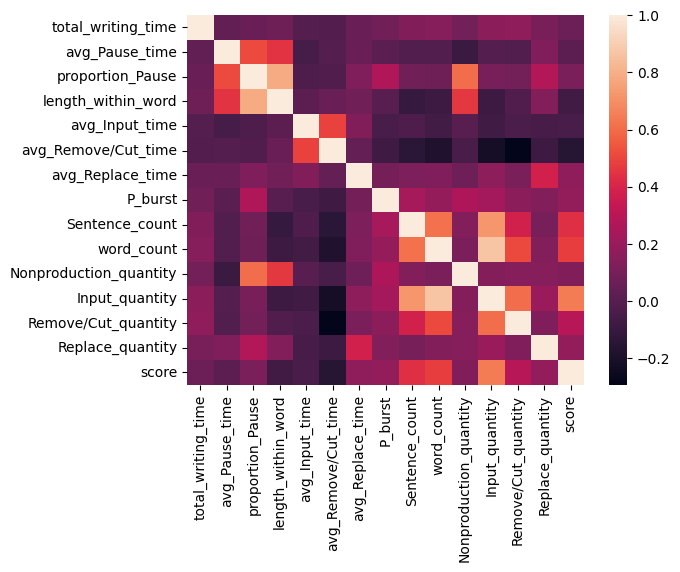

In [24]:
sns.heatmap(df.corr(),fmt='.2f')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x1800 with 0 Axes>

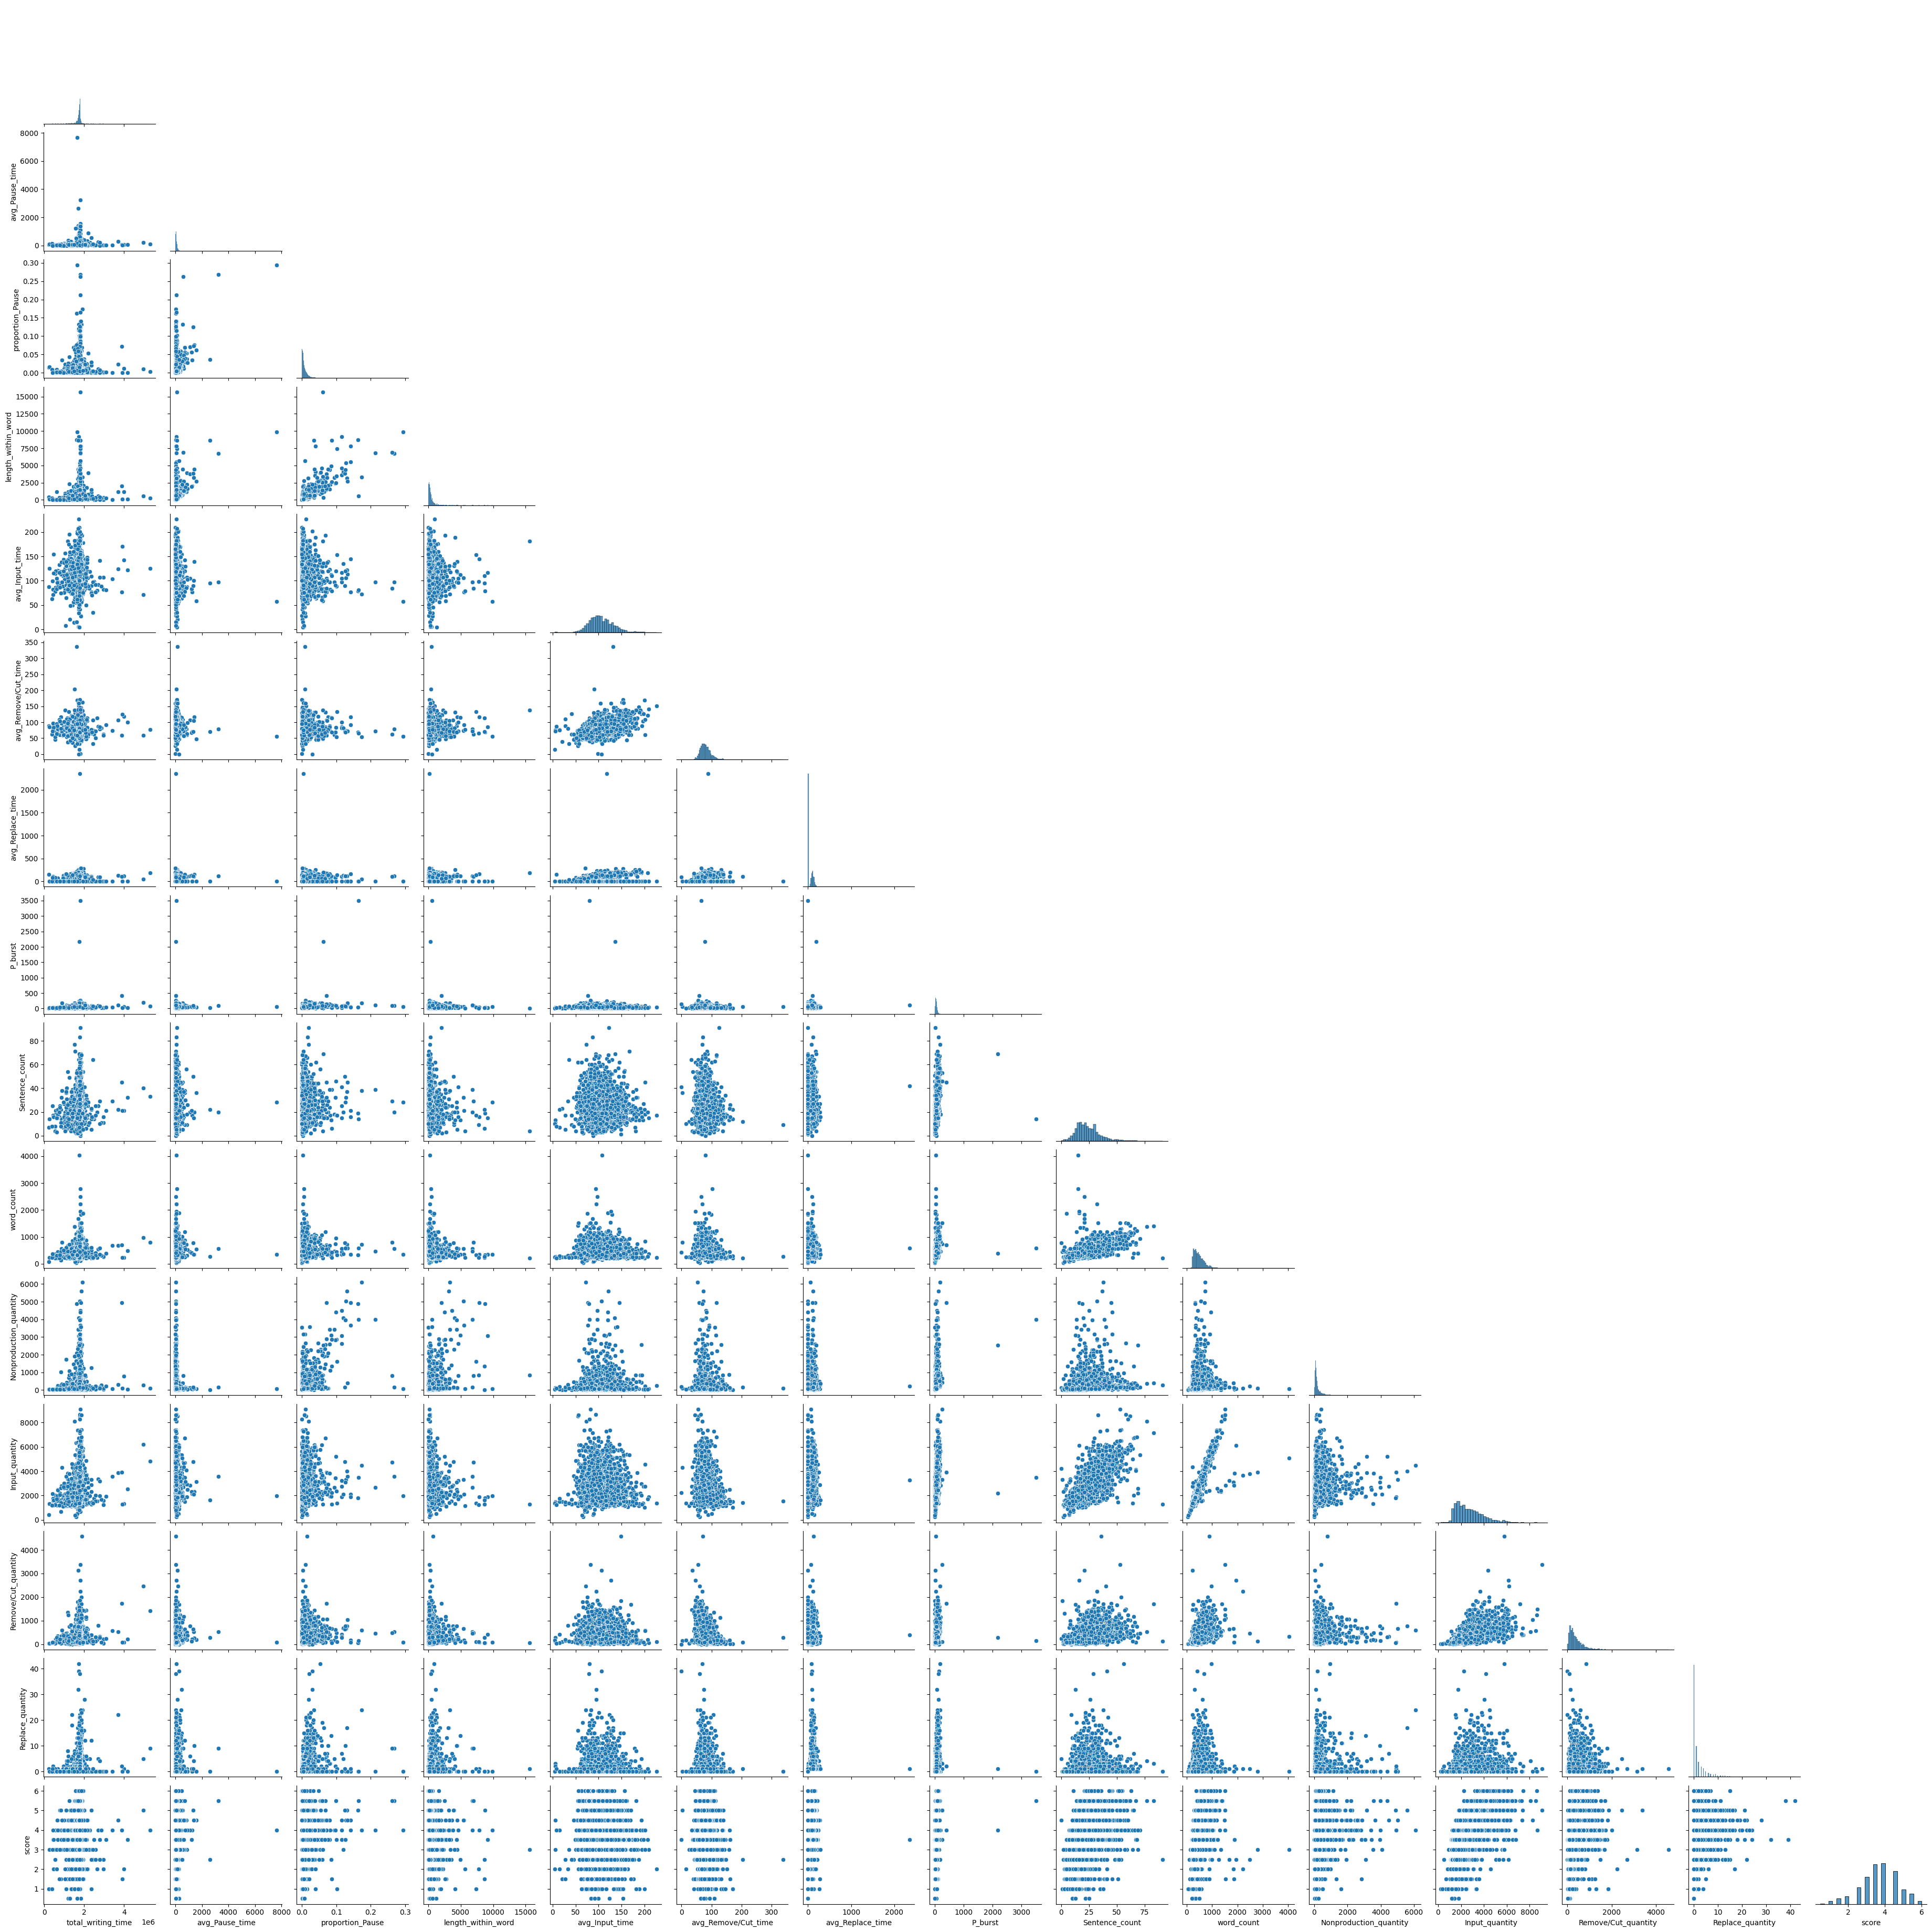

In [25]:
plt.figure(figsize=(18, 18))
sns.pairplot(data=df, corner=True)
plt.show()

<font size=5>*Removing outliers*</font>

In [26]:
z = np.abs(stats.zscore(df))
df = df[(z<3).all(axis=1)]
df.shape

(2132, 15)

<font size=5>**Train with Catboost**</font>

In [27]:
!pip install catboost

In [28]:
from catboost import CatBoostRegressor, Pool

In [29]:
X = df.drop('score', axis=1)
y = df['score']

In [30]:
train_dataset_for_boosting = Pool(data=X,
                                  label=y,)


In [31]:
boosting_params ={
    "iterations": [100, 200, 300, 400 , 500 , 1000],   
    'depth' : np.arange(1,11),
    'learning_rate': [0.01, 0.03, 0.05, 0.001,0.005]
}

In [32]:
model = CatBoostRegressor(eval_metric='RMSE',
                         logging_level='Silent',)

In [33]:
search = model.randomized_search(boosting_params, train_dataset_for_boosting, cv=5, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [34]:
model.best_score_

{'learn': {'RMSE': 0.5826074484340918}}

In [35]:
test_df = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv')

In [36]:
test_df.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0


In [37]:
activity_df = activity_features(test_df)
time_df = time_features(test_df,test=True)
# P_R_burst = P_R_burst(train_df)
time_df.index.rename('id', inplace= True )
activity_df.index.rename('id', inplace= True )

In [38]:
test_df = time_df.merge(activity_df, on='id')

In [39]:
test_df = test_df.drop(['Move_', 'avg_Paste_time', 'avg_Move_time','Move_cursor', 'Paste_quantity'], axis=1)

In [40]:
test_df = test_df.fillna(0)

In [41]:
test_dataset = Pool(data=test_df)

In [42]:
predict_test = model.predict(test_dataset)

In [43]:
submission = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv')

In [44]:
submission['score'] = predict_test

In [45]:
submission

,id,score
0,0000aaaa,1.869036
1,2222bbbb,1.949201
2,4444cccc,1.894748


In [46]:
submission.to_csv('submission.csv', index=None)